In [1]:
import sys
sys.path.append('../src/')

In [2]:
# Third-party libraries:
import numpy as np
from sklearn.datasets import fetch_lfw_people
# My libraries:
import dataset.dataset as dtset
from dbclass.dbclass import DBCLASS
from dbclass import dbclass_utils as db_utils

In [3]:
# import some data to play with
ds = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
ds['data'] = db_utils.get_pca_data(ds['data'], n_components=80)
# Splitting the data for trainning and for test:
ds_train, ds_validation = dtset.split_data(ds, prop_train=0.5)
ds_validation, ds_test = dtset.split_data(ds_validation, prop_train=0.5)

0% concluído...
20% concluído...
50% concluído...
70% concluído...


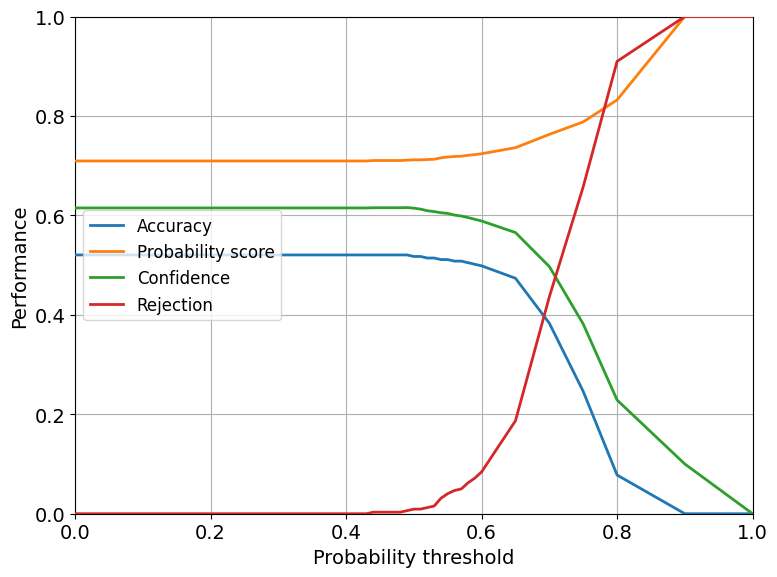


Best probability threshold value: 0.4900000000000001
accuracy 0.520456
prob_score 0.711017
rejection 0.006202
confidence 0.615737


In [4]:
# Trainning the model using cross validation in the trainning dataset:
dbclass = DBCLASS()
prob_thold_list = [0, 0.05, 0.1, 0.15, 0.25, 0.3, 0.35] + list(np.arange(0.4, 0.6, 0.01)) + [0.6, 0.65, 0.7, 0.75, 0.8, 0.9, 0.999]
best_prob_thold, class_metrics = db_utils.cross_validation_trainning(dbclass, ds_train, ds_validation, prob_thold_list)
print("\nBest probability threshold value:", best_prob_thold)
for metric in class_metrics.keys():
    print(metric, class_metrics[metric])

                   precision    recall  f1-score   support

     Ariel Sharon       0.24      0.90      0.38        20
     Colin Powell       0.89      0.41      0.56        59
  Donald Rumsfeld       0.75      0.39      0.51        31
    George W Bush       0.77      0.71      0.74       133
Gerhard Schroeder       0.76      0.57      0.65        28
      Hugo Chavez       0.88      0.39      0.54        18
       Tony Blair       0.44      0.67      0.53        36
          Unknown       0.99      1.00      1.00       162

         accuracy                           0.74       487
        macro avg       0.72      0.63      0.61       487
     weighted avg       0.82      0.74      0.75       487


Confusion matrix:
[[ 3.7   0.    0.    0.    0.21  0.    0.21  0.  ]
 [ 3.49  4.93  0.41  1.64  0.    0.    1.44  0.21]
 [ 1.85  0.    2.46  1.23  0.21  0.    0.62  0.  ]
 [ 4.72  0.41  0.21 19.51  0.21  0.    2.26  0.  ]
 [ 0.62  0.    0.    0.62  3.29  0.21  1.03  0.  ]
 [ 0.41  0.21  

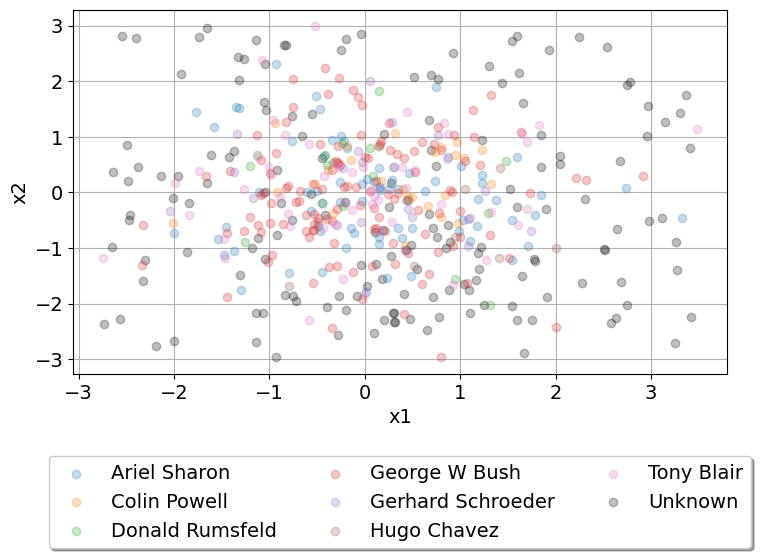

In [5]:
# Once the best probability score threshold is found, the classifier is
# configured with the best settings:
dbclass = DBCLASS(prob_thold=best_prob_thold)
ds_model = dtset.join_data((ds_train, ds_validation))
dbclass.fit(ds_model['data'], ds_model['target'])
ds_test = dtset.insert_rand_noclass(ds_test)
db_utils.dbclass_model_test(dbclass, ds_test)